<a href="https://colab.research.google.com/github/Cole-Pd/DeepDive/blob/main/Project_1_Cole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Transactions by Gaussian Naive Bayes**

# Special Thanks and Reccognition.
#### We would like to thank Robert Citek for his unwavering help, dedicated lectures, and project exmaples used in our notebook.

## Problem Definition


We have been tasked to build modle that predicts wether a transaction is sucsessful. Our data has a binary target reflecting transactions that were either sucsessful or unsecsesfull.
Each transaction has 50 associated variables in the data set. All variables in our model are considered equally. We approached this problem by implmenting Gaussian Naive Bayes, a supervised, model that helps us predict transaction outcomes by catagorization.

## Data Collection/Sources


To effectivly investigate, clean, and describe our findings we chose to use python and the following modules.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
url = 'http://ddc-datascience.s3-website-us-west-1.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'

In [ ]:
transaction_data = pd.read_csv(url)
transactions = transaction_data.copy()

## Data Cleaning
Our data seems to be clean, containing no null values, all data types are floats and there do not seem to be too many 'zero' values.

In [ ]:
transactions.head(20)

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
5,5,train_5,0,11.4763,-2.3182,12.6080,4.5322,5.9790,13.6380,1.2589,...,5.9714,-6.1449,1.4457,21.8853,1.0208,21.0550,-6.3068,6.6025,5.2912,12.5809
6,6,train_6,0,11.8091,-0.0832,9.3494,6.1961,7.9232,14.1629,13.3058,...,6.1887,0.2619,2.6965,17.0152,3.8973,11.9140,8.7830,6.4521,3.5325,10.8869
7,7,train_7,0,13.5580,-7.9881,13.8776,5.6890,7.1971,14.2919,10.9699,...,5.2273,8.9519,0.0876,19.5642,0.0592,24.0369,13.1700,6.5491,3.9906,8.6624
8,8,train_8,0,16.1071,2.4426,13.9307,4.4514,9.0827,14.0654,-3.0572,...,5.9018,3.1838,3.5803,32.9149,-2.1408,-1.7937,1.4298,14.7510,1.6395,19.5114
9,9,train_9,0,12.5088,1.9743,8.8960,6.0637,7.9682,13.9639,0.8071,...,5.8540,-3.0868,-4.5382,18.2209,2.3910,19.0645,0.5543,6.3160,1.0371,16.2375


In [ ]:
transactions.tail() ;

In [ ]:
null_checl = transactions.info();

In [ ]:
#check for "zero" values
for var in range(49):
  zero_check = transactions[f'var_{var}'] == 0
  print(zero_check.value_counts()) ;

In [ ]:
transactions.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,180000.0,89999.500000,51961.668564,0.0000,44999.750000,89999.50000,134999.250000,179999.0000
target,180000.0,0.100222,0.300297,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,180000.0,10.678650,3.041036,0.4084,8.451675,10.52675,12.756200,20.3150
var_1,180000.0,-1.630045,4.050519,-15.0434,-4.745600,-1.61125,1.360225,10.3768
var_2,180000.0,10.712922,2.639146,2.1171,8.720000,10.57960,12.514100,19.3530


## Exploratory Data Analysis


Gaussian Naieve Bayes works best on modles that are normaillay distributed around the mean. Since our variables are continuous and our data across all variables is normally distributed around the mean (see respective hist plots and probability plots), we believe Gaussian Naieve Bayes is an appropriate analysis.

Text(0.5, 1.0, 'Histogram of "Var_10" Values')

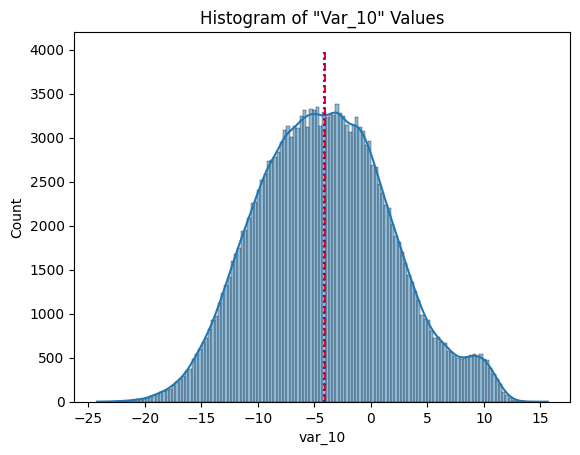

In [ ]:
sns.histplot(transactions['var_10'], kde = True);
plt.vlines(transactions['var_10'].mean(), ymin = 0, ymax = 4000, color = 'red', linestyles = '--')
plt.vlines(transactions['var_10'].median(), ymin = 0, ymax = 4000, color = 'purple', linestyles = 'dotted')
plt.title('Histogram of "Var_10" Values')

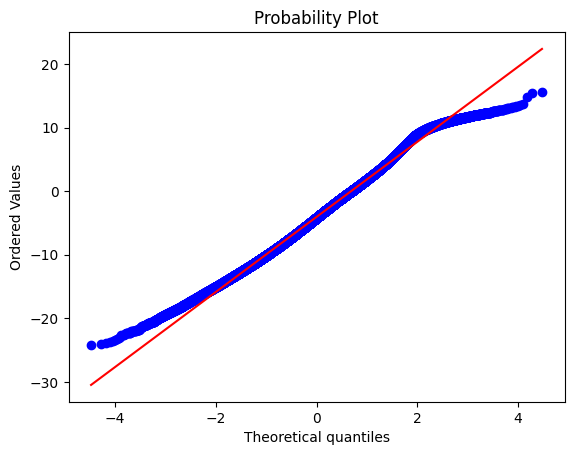

In [ ]:
stats.probplot(transactions['var_10'], dist = "norm", plot=plt) ;

In [ ]:
#stats.kstest? if you seek to show this mathmatically we suggest using some
# variety of a normal test. Please see Stats module doccumentation.

In [ ]:
# from Sci.Py website:
# normaltests "tests the null hypothesis that a sample comes from a normal distribution.
#stats.kstest(transactions.loc[:, 'var_0' : 'var_49'],)

In [ ]:
#stats.shapiro(transactions.loc[:, 'var_0' : 'var_49']);
#stats.shapiro(transactions['var_2'])

Another aspect of Gaussian Naive Bayes is that variables are not corelated. To show that we have found the absolute value of the maximum coorelation between values to be 0.01 on a 0 to 1 scale. Our variables are wholly unrelated.

In [ ]:
corelation = [transactions.loc[:, 'var_0' : 'var_49'].corr().round(2).unstack()]
corelation = pd.DataFrame(corelation).describe().transpose()
corelation['max'].value_counts()

-0.00    2008
-0.01     226
 0.01     216
 1.00      50
Name: max, dtype: int64

<ipython-input-15-1600794bd0f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = transactions.corr()


Text(0.5, 1.0, 'Correlation Heat Map')

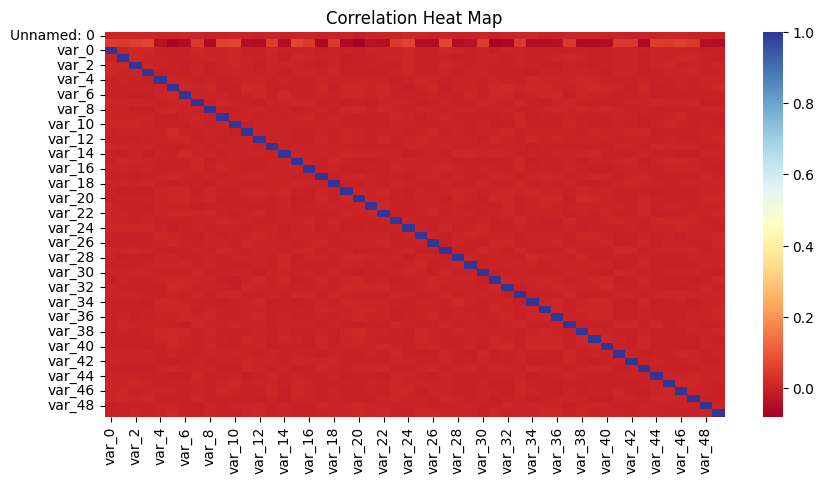

In [ ]:
correlation = transactions.corr()
plt.figure(figsize = (10,5))
sns.heatmap(correlation.loc[:, 'var_0' : 'var_49'], cmap = 'RdYlBu', annot = False)
plt.title('Correlation Heat Map')

In [ ]:
target_1 = transactions[transactions['target'] == 1].copy()
target_0 = transactions[transactions['target'] == 0].copy()

target_1.drop('ID_code', axis = 1, inplace = True)
target_1.drop('Unnamed: 0', axis = 1, inplace = True)

target_0.drop('ID_code', axis = 1, inplace = True)
target_0.drop('Unnamed: 0', axis = 1, inplace = True)

length_check = (len(target_1) + len(target_0)) == len(transactions['target'])
length_check

True

## Processing


Here we take our targets and their respective data to fit, train, and itterate our model.

In [ ]:
gnb = GaussianNB()

In [ ]:
y = transactions['target'].copy()
X = transactions.loc[:, 'var_0' : 'var_49'].copy()

In [ ]:
y.shape

(180000,)

In [ ]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = .20, random_state = 0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = round((100*((y_test == y_pred).sum() / len(y_test))),2)
accuracy #is a percent

90.88

In [ ]:
#metrics.ConfusionMatrixDisplay.from_estimator?
# see: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator

Text(0.5, 1.0, 'Transactions Confusion Matrix')

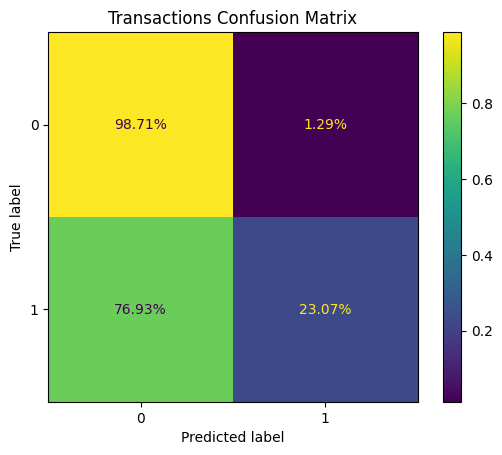

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    estimator = gnb, # we are using the GaussianNB() Pipeline
    X = X,
    y = y,
    labels = None,
    sample_weight = None,
    normalize = 'true',
    values_format = '.2%' #Sets the length of each decimal.
    )
plt.title('Transactions Confusion Matrix')

Our Model has a 1.29% chance of predicting a sucsessful transaction for a truly unsecsessful transaction. It however has a 77% chance of predicting a false 0. If false negatives are more imporatant to the end user than false positives, we suggest implementing another model. To approach this same question we have split our data set to equal and random pools of sucsessful and unsucsessful transactions.

In [ ]:
n=500
looped_accuracy = np.zeros(n)
for i in range(n):
  modle_split_cv = gnb
  X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = .2)
  y_predicted = gnb.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_predicted)
  looped_accuracy[i] = accuracy

In [ ]:
mean_accuracy = sum(looped_accuracy)/n*100
print(f' The mean accuracy is {round(mean_accuracy,2)}%')

 The mean accuracy is 91.12%


Text(0.5, 0, 'Accuracy')

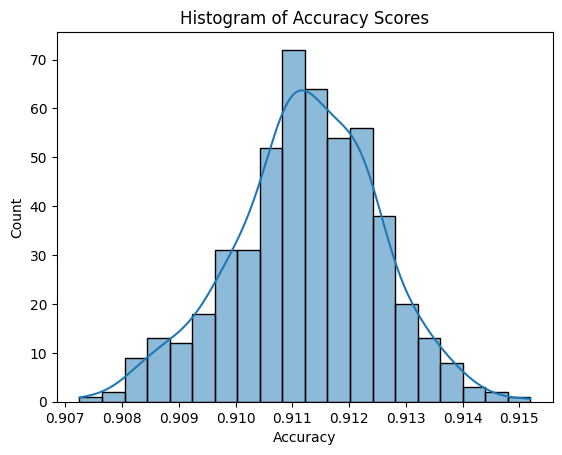

In [ ]:
sns.histplot(looped_accuracy, bins = 20, kde = True)
plt.title('Histogram of Accuracy Scores')
plt.xlabel('Accuracy')

In [ ]:
#sklearn.metrics.classification_report

In [ ]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     32429
           1       0.69      0.24      0.35      3571

    accuracy                           0.91     36000
   macro avg       0.80      0.61      0.65     36000
weighted avg       0.90      0.91      0.89     36000



Our model currently does a really good job of predicting unsucsessful transactions. However, the F1 Score for sucsessful transactions is only 34%.

In [ ]:
y = transactions['target'].copy()
X = transactions.loc[:, 'var_0' : 'var_49'].copy()

In [ ]:
zeros = X[y == 0]
ones = X[y == 1]
print(len(y[y == 1]) == len(ones)) #This should be true. It shows that we have sliced the sucsessful transactions.

True


In [ ]:
sample_0 = zeros.sample(2000)
sample_0 = pd.DataFrame(sample_0)

sample_1 = ones.sample(2000)
sample_1 = pd.DataFrame(sample_1)

In [ ]:
split_50_50 = pd.concat([sample_0, sample_1])
y[split_50_50.index].shape

(4000,)

In [ ]:
n=500
accuracy_50_split = np.zeros(n)
for i in range(n):
  modle_split_cv = gnb
  X_train, X_test, y_train, y_test, = train_test_split(split_50_50, y[split_50_50.index], test_size = .2)
  y_predicted = gnb.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_predicted)
  accuracy_50_split[i] = accuracy

In [ ]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.56      0.99      0.71       397
           1       0.95      0.24      0.38       403

    accuracy                           0.61       800
   macro avg       0.76      0.61      0.55       800
weighted avg       0.76      0.61      0.54       800



Text(0.5, 0, 'Accuracy')

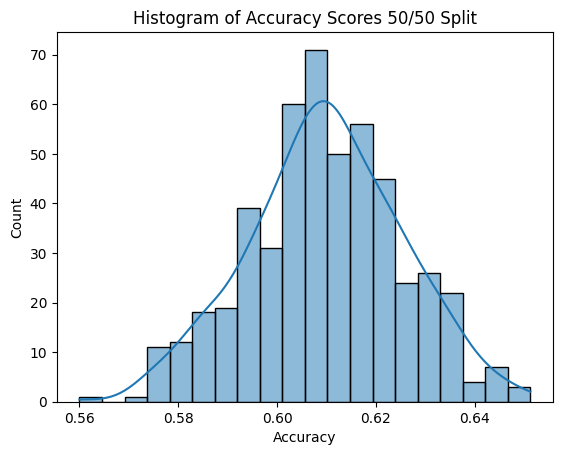

In [ ]:
sns.histplot(accuracy_50_split, bins = 20, kde = True)
plt.title('Histogram of Accuracy Scores 50/50 Split')
plt.xlabel('Accuracy')

Evenly splitting our data does not produce a better F-1 Score. However it removes bias and we believe provides a more reflective prediction of sucsessful or unsucsessful transactions.

In [ ]:
print(split_50_50.shape)
print(y[split_50_50.index].shape)

(4000, 50)
(4000,)


Text(0.5, 1.0, 'Transactions Confusion Matrix 50/50 Split')

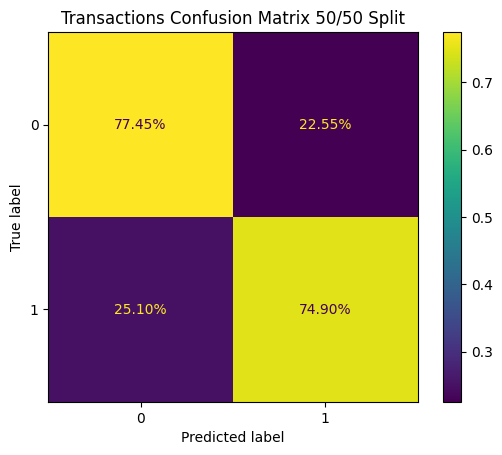

In [ ]:
X = split_50_50
y = y[split_50_50.index]
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = .25, random_state = 0)
gnb.fit(X_train, y_train)

metrics.ConfusionMatrixDisplay.from_estimator(
    estimator = gnb, # we are using the GaussianNB() Pipeline
    X = X,
    y = y,
    labels = None,
    sample_weight = None,
    normalize = 'true',
    values_format = '.2%' #Sets the length of each decimal.
    )
plt.title('Transactions Confusion Matrix 50/50 Split')

## Data Visualization/Communication of Results
Comparing confusion matricies of split and unsplit data. Our unsplit data is seemingly 'better' however the bias in the unsplit dataset helps our model predict unsucsessful transactions at the cost of a potentially many false positives.

We suggest using the whole dataset if predicting true unsucsessful transactions is the most important to the client. We suggest using the split dataset if predicticting sucsessful transactions is the client's goal.

Going Forward, we propose a logistic regrsional model to see if we can describe the binary nature of our data set.


